<a href="https://colab.research.google.com/github/abasilio91/keras_studies/blob/main/keras_exercises_simple_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Building the artificial dataset

based on the youtube video at https://youtu.be/qFJeN9V1ZsI

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)
  
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels,train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

### Building the model using Keras

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation = 'relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2, validation_split=0.1)

Epoch 1/30
189/189 - 1s - loss: 0.7057 - accuracy: 0.4053 - val_loss: 0.6871 - val_accuracy: 0.5429
Epoch 2/30
189/189 - 0s - loss: 0.6741 - accuracy: 0.5513 - val_loss: 0.6590 - val_accuracy: 0.6000
Epoch 3/30
189/189 - 0s - loss: 0.6461 - accuracy: 0.6222 - val_loss: 0.6294 - val_accuracy: 0.6714
Epoch 4/30
189/189 - 0s - loss: 0.6159 - accuracy: 0.6847 - val_loss: 0.6003 - val_accuracy: 0.7286
Epoch 5/30
189/189 - 0s - loss: 0.5880 - accuracy: 0.7238 - val_loss: 0.5745 - val_accuracy: 0.7524
Epoch 6/30
189/189 - 0s - loss: 0.5607 - accuracy: 0.7614 - val_loss: 0.5473 - val_accuracy: 0.7714
Epoch 7/30
189/189 - 0s - loss: 0.5321 - accuracy: 0.7873 - val_loss: 0.5199 - val_accuracy: 0.7952
Epoch 8/30
189/189 - 0s - loss: 0.5033 - accuracy: 0.8201 - val_loss: 0.4934 - val_accuracy: 0.8286
Epoch 9/30
189/189 - 0s - loss: 0.4755 - accuracy: 0.8344 - val_loss: 0.4685 - val_accuracy: 0.8333
Epoch 10/30
189/189 - 0s - loss: 0.4492 - accuracy: 0.8598 - val_loss: 0.4456 - val_accuracy: 0.8381

### Making artificial test samples

In [11]:
test_labels = []
test_samples = []

In [12]:
for i in range(50):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)
  
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [13]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels,test_samples)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

predicting

In [15]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [16]:
predictions

array([[0.0922152 , 0.9077848 ],
       [0.9551393 , 0.04486075],
       [0.7903191 , 0.20968089],
       ...,
       [0.9576547 , 0.04234526],
       [0.95792764, 0.04207231],
       [0.1655261 , 0.8344739 ]], dtype=float32)

In [17]:
rounded_predcitions = np.argmax(predictions, axis=-1)

In [18]:
rounded_predcitions

array([1, 0, 0, ..., 0, 0, 1])

confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predcitions)

In [21]:
def plot_confusion_matrix(cm,classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')

  else:
    print('Confusion matrix, without normalization')

  print(cm)
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, cm[i,j],
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 945  105]
 [  45 1005]]


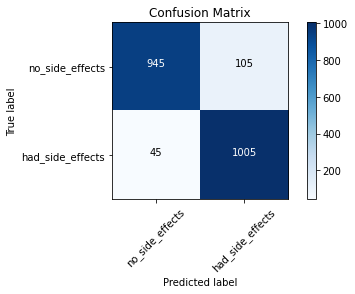

In [22]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Saving the model

Saves everything

In [24]:
  import os.path
  if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

# Loading the model

In [27]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [29]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [30]:
new_model.get_weights()

[array([[-0.11511254, -0.11714834,  0.5750631 ,  0.6024688 ,  0.5711758 ,
          0.32264018, -0.42454606,  0.7198497 , -0.2788613 , -0.28463364,
         -0.5747298 ,  0.770918  ,  0.64180523, -0.49537572, -0.30074325,
         -0.1261045 ]], dtype=float32),
 array([ 0.        ,  0.        , -0.14120366, -0.15416674, -0.17129806,
         0.2140407 ,  0.        , -0.00649926,  0.        ,  0.        ,
         0.        , -0.15695284, -0.17927586,  0.        ,  0.        ,
         0.        ], dtype=float32),
 array([[-0.3101231 , -0.05907235,  0.22310612,  0.07525024, -0.01737884,
          0.0222854 ,  0.23851195,  0.18375435,  0.03859091,  0.29890618,
         -0.25166398, -0.01867762,  0.11430588, -0.04329601, -0.07173815,
         -0.12765117,  0.15692547,  0.24837324,  0.09954512,  0.33560893,
         -0.30867153,  0.2781336 ,  0.19246289,  0.19349608,  0.10974279,
          0.14702997,  0.0948604 ,  0.3416817 , -0.02673855,  0.16816577,
         -0.18207759, -0.31360003],
 

In [31]:
new_model.optimizer

# To json

saves only the architecture

In [33]:
json_string = model.to_json()
# model_to_yaml()

In [34]:
from tensorflow.keras.models import model_from_json

model_architecture = model_from_json(json_string)
# model_architecture = model_from_yaml(json_string)

# Only the model weights

In [37]:
import os.path

if os.path.isfile('models/my_model_weights.h5') is False:
  model.save_weights('models/my_model_weights.h5')

In [38]:
model2 = Sequential([
                    Dense(units=16, input_shape=(1,), activation = 'relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

model2.load_weights('models/my_model_weights.h5')

In [ ]:
model2.get_weights()